In [19]:
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import math

import pandas as pd
# import matplotlib.pyplot as plt
from AmadeusClient import AmadeusFlightSearch, FlightSearchParameters
from process_search_results import aggregate_bulk_flight_search, write_bulk_results

In [3]:
def plot_airline_prices(flight_data: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 8))
    
    subplot_dim = math.floor(len(set(flight_data['airline_name'])) / 2)
    for i, airline in enumerate(set(flight_data['airline_name']), start=1):
        ax = fig.add_subplot(subplot_dim, subplot_dim, i)
        airline_flights = flight_data[flight_data['airline_name'] == airline]
        ax.plot(airline_flights['price'], label='Flight Price')
        max_price = round(airline_flights['price'].max(), 2)
        min_price = round(airline_flights['price'].min(), 2)
        mean_price = round(airline_flights['price'].mean(), 2)

        ax.axhline(y=max_price, color='r', linestyle='--', label=f'Max Price {max_price}')
        ax.axhline(y=min_price, color='g', linestyle='--', label=f'Min Price {min_price}')
        ax.axhline(y=mean_price, color='b', linestyle='--', label=f'Average Price {mean_price}')
        
        ax.set(xlabel="Flight Count", ylabel="Flight Prices", title=f"{airline} Flight Prices ({str(df['departure_time'].iloc[0].date())})")
        ax.legend()
    
    plt.tight_layout()
    plt.show()

def find_cheapest_flight(data: pd.DataFrame):
    return data['total_price'].min()

In [278]:
search_1_params = FlightSearchParameters(api_key=os.getenv('AMADEUS_PROD_API_KEY'), api_secret=os.getenv('AMADEUS_PROD_API_SECRET'),
                                         env='prod', version='v2', origin='SFO', destination='TPA',
                                       departure_date="2025-02-10", return_date="2025-02-20", search_range=4, direction='earlier')
round_trip_results = AmadeusFlightSearch(search_1_params).single_flight_search()

search_2_params = FlightSearchParameters(api_key=os.getenv('AMADEUS_PROD_API_KEY'), api_secret=os.getenv('AMADEUS_PROD_API_SECRET'),
                                         env='prod', version='v2', origin='SFO', destination='RIO',
                                       departure_date="2025-02-28", search_range=4, direction='earlier')
one_way_results = AmadeusFlightSearch(search_2_params).single_flight_search()
# single_dir_responses = client1.single_direction_bulk_flight_search(inclusive_search=True)

In [225]:
from flight_parser import parse_flight_offers, transform_duration_str, get_flight_time, get_airline, get_aircraft

In [281]:
flight_offers = parse_flight_offers(round_trip_results)
len(flight_offers['flight_offer_1'])

4

In [282]:
flight_offers

{'flight_offer_1': {'flight_1': Segment(offer_price='205.99', currency='USD', total_duration='PT13H19M', bookable_seats=7, segment_id='19', departure_airport='SFO', departure_time='2025-02-10T09:26:00', arrival_airport='DFW', arrival_time='2025-02-10T15:03:00', carrier_code='F9', flight_number='4000', aircraft_code='32N', stops=0, flight_duration='PT3H37M', cabin_type='ECONOMY'),
  'flight_2': Segment(offer_price='205.99', currency='USD', total_duration='PT13H19M', bookable_seats=7, segment_id='20', departure_airport='DFW', departure_time='2025-02-10T22:20:00', arrival_airport='TPA', arrival_time='2025-02-11T01:45:00', carrier_code='F9', flight_number='1334', aircraft_code='32N', stops=0, flight_duration='PT2H25M', cabin_type='ECONOMY'),
  'flight_3': Segment(offer_price='205.99', currency='USD', total_duration='PT29H10M', bookable_seats=7, segment_id='61', departure_airport='TPA', departure_time='2025-02-20T22:33:00', arrival_airport='DEN', arrival_time='2025-02-21T00:44:00', carrier_

In [265]:
flight_offers['flight_offer_2'].keys()

dict_keys(['flight_1', 'flight_2', 'flight_3', 'flight_4'])

In [275]:
it = iter(['sdfsd'])

# Zip the iterator with itself to produce pairs.
for flight_1, flight_2 in list(zip(it, it)):
    print(flight_1, flight_2)

In [263]:
flight_num = flight_offers['flight_offer_2'].keys()
if len(flight_offers['flight_offer_2'].keys()) % 2 == 0:
    flight_offers['flight_offer_2']

0

In [256]:
for k,v in flight_offers.items():
    print(k,v)
    break

flight_offer_1 {'flight_1': Segment(offer_price='494.93', currency='USD', total_duration='PT20H47M', bookable_seats=7, segment_id='42', departure_airport='SFO', departure_time='2025-02-01T11:56:00', arrival_airport='DEN', arrival_time='2025-02-01T15:37:00', carrier_code='F9', flight_number='1230', aircraft_code='32N', stops=0, flight_duration='PT2H41M', cabin_type='ECONOMY'), 'flight_2': Segment(offer_price='494.93', currency='USD', total_duration='PT20H47M', bookable_seats=7, segment_id='43', departure_airport='DEN', departure_time='2025-02-02T06:05:00', arrival_airport='TPA', arrival_time='2025-02-02T11:43:00', carrier_code='F9', flight_number='1114', aircraft_code='32Q', stops=0, flight_duration='PT3H38M', cabin_type='ECONOMY'), 'flight_3': Segment(offer_price='494.93', currency='USD', total_duration='PT18H', bookable_seats=7, segment_id='56', departure_airport='TPA', departure_time='2025-02-20T22:33:00', arrival_airport='DEN', arrival_time='2025-02-21T00:44:00', carrier_code='F9', 

In [255]:
flight_offers = parse_flight_offers(round_trip_results)
flight_offers['flight_offer_65']

{'flight_1': Segment(offer_price='568.40', currency='USD', total_duration='PT9H58M', bookable_seats=9, segment_id='54', departure_airport='SFO', departure_time='2025-02-01T06:38:00', arrival_airport='DEN', arrival_time='2025-02-01T10:20:00', carrier_code='UA', flight_number='513', aircraft_code='752', stops=0, flight_duration='PT2H42M', cabin_type='ECONOMY'),
 'flight_2': Segment(offer_price='568.40', currency='USD', total_duration='PT9H58M', bookable_seats=9, segment_id='55', departure_airport='DEN', departure_time='2025-02-01T14:05:00', arrival_airport='TPA', arrival_time='2025-02-01T19:36:00', carrier_code='UA', flight_number='1544', aircraft_code='739', stops=0, flight_duration='PT3H31M', cabin_type='ECONOMY'),
 'flight_3': Segment(offer_price='568.40', currency='USD', total_duration='PT8H11M', bookable_seats=9, segment_id='68', departure_airport='TPA', departure_time='2025-02-20T07:00:00', arrival_airport='IAH', arrival_time='2025-02-20T08:37:00', carrier_code='UA', flight_number=

In [ ]:
flight_offers

In [243]:
list(flight_offers['flight_offer_65'].keys())[-1]

'flight_2'

In [236]:
one_way_results['dictionaries']

{'locations': {'ORD': {'cityCode': 'CHI', 'countryCode': 'US'},
  'EWR': {'cityCode': 'NYC', 'countryCode': 'US'},
  'LAX': {'cityCode': 'LAX', 'countryCode': 'US'},
  'TPA': {'cityCode': 'TPA', 'countryCode': 'US'},
  'FLL': {'cityCode': 'FLL', 'countryCode': 'US'},
  'BOS': {'cityCode': 'BOS', 'countryCode': 'US'},
  'SNA': {'cityCode': 'SNA', 'countryCode': 'US'},
  'DEN': {'cityCode': 'DEN', 'countryCode': 'US'},
  'IAD': {'cityCode': 'WAS', 'countryCode': 'US'},
  'SEA': {'cityCode': 'SEA', 'countryCode': 'US'},
  'JFK': {'cityCode': 'NYC', 'countryCode': 'US'},
  'IAH': {'cityCode': 'HOU', 'countryCode': 'US'},
  'SFO': {'cityCode': 'SFO', 'countryCode': 'US'}},
 'aircraft': {'AT4': 'ATR 42',
  'E75': 'EMBRAER 175',
  '7M8': 'BOEING 737 MAX 8',
  '7M9': 'BOEING 737 MAX 9',
  'E7W': 'EMBRAER 175 (ENHANCED WINGLETS)',
  '73H': 'BOEING 737-800 (WINGLETS)',
  '73J': 'BOEING 737-900',
  '32N': 'AIRBUS A320NEO',
  '320': 'AIRBUS A320',
  '32Q': 'AIRBUS A321NEO',
  '321': 'AIRBUS A321',

In [248]:
def _get_next_day_arrival_str(total_duration: str):
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?', 'PT29H19M')
    return f"+{int(match.group(1)) // 24}"

+1


In [253]:
match.group(1)

'29'

In [217]:
print(transform_duration_str('PT8H45M'), get_flight_time('2025-02-01T17:54:00'))

8h 45m 05:54 pm


In [229]:
one_way_results['dictionaries']['carriers']

{'locations': {'ORD': {'cityCode': 'CHI', 'countryCode': 'US'},
  'EWR': {'cityCode': 'NYC', 'countryCode': 'US'},
  'LAX': {'cityCode': 'LAX', 'countryCode': 'US'},
  'TPA': {'cityCode': 'TPA', 'countryCode': 'US'},
  'FLL': {'cityCode': 'FLL', 'countryCode': 'US'},
  'BOS': {'cityCode': 'BOS', 'countryCode': 'US'},
  'SNA': {'cityCode': 'SNA', 'countryCode': 'US'},
  'DEN': {'cityCode': 'DEN', 'countryCode': 'US'},
  'IAD': {'cityCode': 'WAS', 'countryCode': 'US'},
  'SEA': {'cityCode': 'SEA', 'countryCode': 'US'},
  'JFK': {'cityCode': 'NYC', 'countryCode': 'US'},
  'IAH': {'cityCode': 'HOU', 'countryCode': 'US'},
  'SFO': {'cityCode': 'SFO', 'countryCode': 'US'}},
 'aircraft': {'AT4': 'ATR 42',
  'E75': 'EMBRAER 175',
  '7M8': 'BOEING 737 MAX 8',
  '7M9': 'BOEING 737 MAX 9',
  'E7W': 'EMBRAER 175 (ENHANCED WINGLETS)',
  '73H': 'BOEING 737-800 (WINGLETS)',
  '73J': 'BOEING 737-900',
  '32N': 'AIRBUS A320NEO',
  '320': 'AIRBUS A320',
  '32Q': 'AIRBUS A321NEO',
  '321': 'AIRBUS A321',

In [223]:
one_way_results['dictionaries']['carriers']
# airline = flight_metadata['carriers'][segments[0]["carrierCode"]]

{'AS': 'ALASKA AIRLINES',
 'F9': 'FRONTIER AIRLINES',
 'B6': 'JETBLUE AIRWAYS',
 '3M': 'SILVER AIRWAYS CORP',
 'UA': 'UNITED AIRLINES'}

In [ ]:
airline = flight_metadata['carriers'][segments[0]["carrierCode"]]

In [202]:
parse_flight_offers(one_way_results)

{'flight_offer_1': {'flight_1': Segment(offer_price='314.04', currency='USD', total_duration='PT8H45M', bookable_seats=7, segment_id='142', departure_airport='SFO', departure_time='2025-02-01T17:54:00', arrival_airport='SEA', arrival_time='2025-02-01T20:20:00', carrier_code='AS', flight_number='2089', aircraft_code='E75', stops=0, flight_duration='PT2H26M', cabin_type='ECONOMY'),
  'flight_2': Segment(offer_price='314.04', currency='USD', total_duration='PT8H45M', bookable_seats=7, segment_id='143', departure_airport='SEA', departure_time='2025-02-01T21:15:00', arrival_airport='TPA', arrival_time='2025-02-02T05:39:00', carrier_code='AS', flight_number='360', aircraft_code='7M9', stops=0, flight_duration='PT5H24M', cabin_type='ECONOMY')},
 'flight_offer_2': {'flight_1': Segment(offer_price='410.58', currency='USD', total_duration='PT20H47M', bookable_seats=7, segment_id='150', departure_airport='SFO', departure_time='2025-02-01T11:56:00', arrival_airport='DEN', arrival_time='2025-02-01T

In [24]:
# DUAL DIRECTION FLIGHT SEARCH
search_2_params = FlightSearchParameters(api_key=os.getenv('AMADEUS_PROD_API_KEY'), api_secret=os.getenv('AMADEUS_PROD_API_SECRET'),
                                         env='prod', version='v2', origin='SFO', destination='HNL',
                                       departure_date="2025-02-27", search_range=3)
client2 = AmadeusFlightSearch(search_2_params)
dual_dir_results = client2.dual_direction_bulk_flight_search()

Running a 0 day earlier scenario...
Running a 1 day earlier scenario...
Running a 2 day earlier scenario...
Running a 3 day earlier scenario...
Running a 1 day later scenario...
Running a 2 day later scenario...
Running a 3 day later scenario...


In [25]:
bulk_results = aggregate_bulk_flight_search(dual_dir_results)

In [26]:
bulk_results

,total_price,airline_code,itinerary_id,origin_1,destination_1,departure_time_1,arrival_time_1,carrier_1,flight_number_1,aircraft_1,...,origin_2,destination_2,departure_time_2,arrival_time_2,carrier_2,flight_number_2,aircraft_2,duration_2,num_of_stops,departure_date
0,143.45,HA,1,SFO,HNL,2025-02-27 07:45:00,2025-02-27 07:45:00,HAWAIIAN AIRLINES,11,AIRBUS A330-200,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
1,143.45,AS,2,SFO,HNL,2025-02-27 07:45:00,2025-02-27 07:45:00,ALASKA AIRLINES,8011,AIRBUS A330-200,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
2,178.44,AS,3,SFO,SEA,2025-02-27 11:35:00,2025-02-27 11:35:00,ALASKA AIRLINES,1225,BOEING 737-900,...,SEA,HNL,2025-02-27 16:20:00,2025-02-27 16:20:00,ALASKA AIRLINES,811,BOEING 737 MAX 9,PT6H23M,1,2025-02-27
3,178.44,AS,4,SFO,SEA,2025-02-27 09:00:00,2025-02-27 09:00:00,ALASKA AIRLINES,1289,BOEING 737-800 (WINGLETS),...,SEA,HNL,2025-02-27 14:23:00,2025-02-27 14:23:00,ALASKA AIRLINES,853,BOEING 737-900,PT6H23M,1,2025-02-27
4,178.44,HA,5,SFO,SEA,2025-02-27 11:35:00,2025-02-27 11:35:00,HAWAIIAN AIRLINES,6900,BOEING 737 ALL SERIES PASSENGER,...,SEA,HNL,2025-02-27 16:20:00,2025-02-27 16:20:00,HAWAIIAN AIRLINES,7811,BOEING 737 MAX 9,PT6H23M,1,2025-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,572.02,AS,88,SFO,LAS,2025-03-02 18:49:00,2025-03-02 18:49:00,ALASKA AIRLINES,640,BOEING 737-800 (WINGLETS),...,LAS,HNL,2025-03-03 01:30:00,2025-03-03 01:30:00,ALASKA AIRLINES,8017,AIRBUS A330-200,PT6H25M,1,2025-03-02
88,681.08,AS,89,SFO,LAS,2025-03-02 14:34:00,2025-03-02 14:34:00,ALASKA AIRLINES,396,BOEING 737-800 (WINGLETS),...,LAS,HNL,2025-03-02 17:30:00,2025-03-02 17:30:00,ALASKA AIRLINES,8005,AIRBUS A330-200,PT6H35M,1,2025-03-02
89,742.47,AS,90,SFO,LAS,2025-03-02 10:10:00,2025-03-02 10:10:00,ALASKA AIRLINES,3304,EMBRAER 175,...,LAS,HNL,2025-03-02 17:30:00,2025-03-02 17:30:00,ALASKA AIRLINES,8005,AIRBUS A330-200,PT6H35M,1,2025-03-02
90,774.83,UA,91,SFO,DEN,2025-03-02 06:30:00,2025-03-02 06:30:00,UNITED AIRLINES,732,BOEING 757-200,...,DEN,HNL,2025-03-02 12:05:00,2025-03-02 12:05:00,UNITED AIRLINES,384,BOEING 777-200/300,PT7H37M,1,2025-03-02


/var/folders/vh/g_h9q3rd4w3d2hjvr_1twd3r0000gn/T/ipykernel_14252/3922995557.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_prices = (bulk_results.groupby("departure_date").apply(lambda x: x.nsmallest(5, "total_price")).reset_index(drop=True))


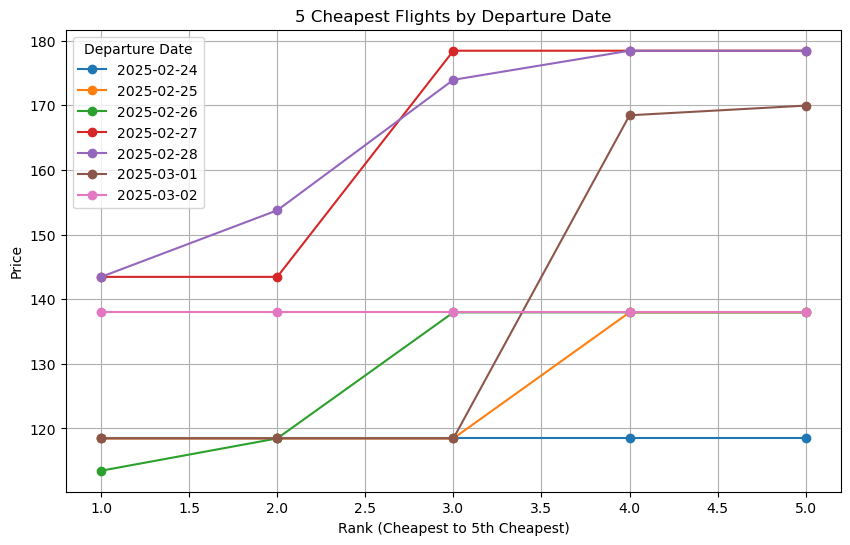

In [27]:
# Group data by departure date and find the 5 cheapest flights for each date
top_5_prices = (bulk_results.groupby("departure_date").apply(lambda x: x.nsmallest(5, "total_price")).reset_index(drop=True))

# Plot the 5 cheapest flights for each departure date
plt.figure(figsize=(10, 6))
for dep_date in top_5_prices["departure_date"].unique():
    data_slice = top_5_prices[top_5_prices["departure_date"] == dep_date]
    plt.plot(range(1, len(data_slice) + 1), data_slice["total_price"], marker="o", label=dep_date)

# Add labels and title
plt.title("5 Cheapest Flights by Departure Date")
plt.xlabel("Rank (Cheapest to 5th Cheapest)")
plt.ylabel("Price")
plt.legend(title="Departure Date", loc="upper left")
plt.grid(True)
plt.show()

In [28]:
bulk_results[bulk_results['num_of_stops'] == 0]

,total_price,airline_code,itinerary_id,origin_1,destination_1,departure_time_1,arrival_time_1,carrier_1,flight_number_1,aircraft_1,...,origin_2,destination_2,departure_time_2,arrival_time_2,carrier_2,flight_number_2,aircraft_2,duration_2,num_of_stops,departure_date
0,143.45,HA,1,SFO,HNL,2025-02-27 07:45:00,2025-02-27 07:45:00,HAWAIIAN AIRLINES,11,AIRBUS A330-200,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
1,143.45,AS,2,SFO,HNL,2025-02-27 07:45:00,2025-02-27 07:45:00,ALASKA AIRLINES,8011,AIRBUS A330-200,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
13,188.74,AS,14,SFO,HNL,2025-02-27 09:00:00,2025-02-27 09:00:00,ALASKA AIRLINES,877,BOEING 737 MAX 9,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
14,188.74,HA,15,SFO,HNL,2025-02-27 09:00:00,2025-02-27 09:00:00,HAWAIIAN AIRLINES,7877,BOEING 737 MAX 9,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
59,253.71,UA,60,SFO,HNL,2025-02-27 13:40:00,2025-02-27 13:40:00,UNITED AIRLINES,300,BOEING 777-200/300,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
60,253.71,UA,61,SFO,HNL,2025-02-27 09:30:00,2025-02-27 09:30:00,UNITED AIRLINES,1175,BOEING 777-300ER,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
75,306.69,UA,76,SFO,HNL,2025-02-27 11:20:00,2025-02-27 11:20:00,UNITED AIRLINES,2380,BOEING 757-300,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
90,376.66,UA,91,SFO,HNL,2025-02-27 16:55:00,2025-02-27 16:55:00,UNITED AIRLINES,1509,BOEING 737 MAX 9,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-27
0,113.46,HA,1,SFO,HNL,2025-02-26 07:45:00,2025-02-26 07:45:00,HAWAIIAN AIRLINES,11,AIRBUS A330-200,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-26
1,118.46,AS,2,SFO,HNL,2025-02-26 07:45:00,2025-02-26 07:45:00,ALASKA AIRLINES,8011,AIRBUS A330-200,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0,2025-02-26


In [27]:
from datetime import datetime

# Input string
date_time_str = '2025-01-28T11:00:00'
date_time_str2 = '2025-01-29T19:44:00'


# Parse the string into a datetime object
date_time_obj = datetime.fromisoformat(date_time_str)
print(type(datetime.now()))
# date_time_obj2 = datetime.fromisoformat(date_time_str2)
#
# # Extract hours and minutes
# total_minutes = (date_time_obj2-date_time_obj).total_seconds() // 60
# hours = int(total_minutes // 60)
# minutes = int(total_minutes % 60)
#
# # Format as "hours:minutes"
# formatted_difference = f"{hours}:{minutes:02d}"

# Format to display only the time in 12-hour format with AM/PM
# formatted_time = date_time_obj.strftime('%I:%M %p').lower()  # '11:00 am'

# print(formatted_time)

<class 'datetime.datetime'>


In [25]:
formatted_difference

'32:44'

In [21]:
(date_time_obj-date_time_obj2).total_seconds() // 60

-1964.0

In [17]:
thing = """<div style="flex: 4;">
<div style="display: flex; align-items: center; margin-bottom: 10px;"><span style="font-size: 16px; font-weight: bold;">9:50 pm – 2:00 pm +2</span></div><div style="font-size: 14px; margin-bottom: 5px;">United Airlines</div><div style="font-size: 12px; color: #aaa; margin-top: 5px;">1 stop | IAH | 28h 10m | GRU-NRT</div></div>"""

In [18]:
thing

'<div style="flex: 4;">\n<div style="display: flex; align-items: center; margin-bottom: 10px;"><span style="font-size: 16px; font-weight: bold;">9:50 pm – 2:00 pm +2</span></div><div style="font-size: 14px; margin-bottom: 5px;">United Airlines</div><div style="font-size: 12px; color: #aaa; margin-top: 5px;">1 stop | IAH | 28h 10m | GRU-NRT</div></div>'